In [30]:
# from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import librosa
import pandas as pd
import os
import matplotlib.pyplot as plt

In [31]:
def understand_audio(file_path):
    audio, _ = librosa.load(file_path, sr=None)

    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=_)

    # Convert power spectrogram to dB scale
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=_, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [32]:
# Preprocess audio data
def preprocess_audio(file_path, target_duration=10):
    audio, _ = librosa.load(file_path, sr=None)

    target_length = int(target_duration * _)
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]

    mfccs = librosa.feature.mfcc(y=audio, sr=_, n_mfcc=13)
    return mfccs

In [33]:
unseen_data_path = 'unseen_sample.wav'

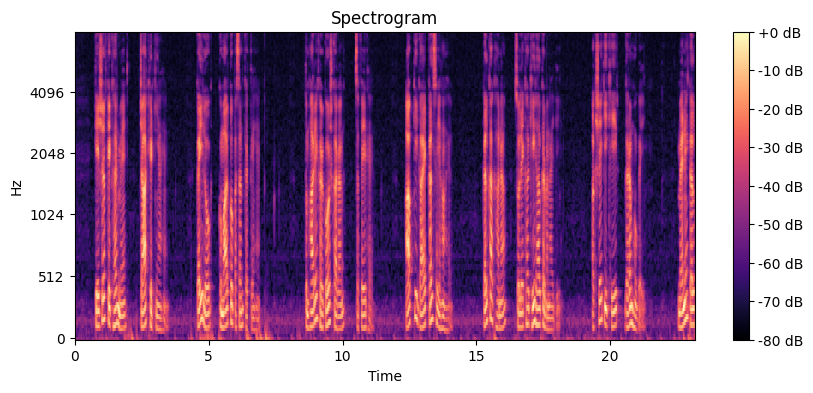

In [34]:
understand_audio(unseen_data_path)

In [35]:
unseen_audio = preprocess_audio(unseen_data_path)

print("MFCCS")
print(unseen_audio)

MFCCS
[[-5.0811240e+02 -4.6944873e+02 -4.6574460e+02 ... -2.0573247e+02
  -2.4051035e+02 -2.8771454e+02]
 [ 4.2891052e+01  4.4251724e+01  4.4757446e+01 ...  1.1669597e+02
   1.3101289e+02  1.3320268e+02]
 [ 1.2703760e+01  1.0266409e+01  7.3592930e+00 ... -7.2163979e+01
  -4.3322151e+01 -2.4979215e+00]
 ...
 [-7.9081869e+00 -1.0696405e+01 -3.9495163e+00 ... -1.4748940e+00
   8.1085920e-02  5.1130228e+00]
 [-5.7249355e+00 -1.1666517e+01 -4.7050300e+00 ... -6.5302138e+00
  -9.8387527e+00 -9.7509251e+00]
 [-6.4007235e+00 -1.1688772e+01 -1.0409088e+01 ... -3.3728584e+01
  -3.5780190e+01 -2.6288361e+01]]


In [36]:
# Ensure that the input shape matches the model's expected input shape
unseen_audio = unseen_audio[np.newaxis, ..., np.newaxis]

In [37]:
# Make predictions
model = tf.keras.models.load_model('model.h5')
predictions = model.predict(unseen_audio)

OSError: Unable to open file (file signature not found)

In [ ]:
# Print the predictions
# If binary_predictions is [1], it means the model predicts the input audio contains hate speech.
# If it is [0], it means the model predicts the input audio does not contain hate speech.

# Threshold the predictions for binary classification
binary_predictions = (predictions > 0.5).astype(int)
print("Predictions:", binary_predictions.flatten())

# Print the raw probability scores
print("Raw Probabilities:", predictions.flatten())